In [190]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from env import get_connection

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from scipy.stats import mannwhitneyu

import acquire as ak
import prepare as prep

# 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [61]:
db_url = get_connection('iris_db')
query_one = '''

SELECT *
FROM measurements

'''

query_two = '''

SELECT *
FROM species

'''

In [62]:
iris_m = pd.read_sql(query_one, db_url)
iris_s = pd.read_sql(query_two, db_url)

# print the first 3 rows

In [63]:
# the iris measurements db as a df
iris_m.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1


In [64]:
# the iris species db as df
iris_s.head()

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


# print the number of rows and columns (shape)

In [65]:
iris_m.shape

(150, 6)

# print the column names
# print the data type of each column

In [66]:
iris_m.columns.tolist()

['measurement_id',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species_id']

In [67]:
iris_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


# print the summary statistics for each of the numeric variables

In [68]:
iris_m.describe()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333,2.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


# 5. Read the data from this google sheet into a dataframe, df_google.

In [69]:
train = pd.read_excel('/Users/edwige/downloads/train.xlsx')

# print the first 3 rows

In [70]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# print the number of rows and columns

In [71]:
train.shape

(891, 12)

# print the column names

# print the data type of each column

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# print the summary statistics for each of the numeric variables

In [74]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# print the unique values for each of your categorical variables

In [75]:
# UNIQUE VALUES For all catagorical classes 
print(train.Survived.unique())
print(train.Pclass.unique())
print(train.Sex.unique())
print(train.SibSp.unique())
print(train.Parch.unique())
print(train.Embarked.unique())

[0 1]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]


In [76]:
train.dtypes == 'int64'

PassengerId     True
Survived        True
Pclass          True
Name           False
Sex            False
Age            False
SibSp           True
Parch           True
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [77]:
# setting up variable to iterate over index if I have times. 
##Refactor below awnser into something cleaner and more programatic.

cata = train.nunique()
cata

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [78]:
# I would need to itterate value counts to ittereate a list to print out all teh unique value contained.

In [79]:
# This is a more programatic way Need to prse it
# # Dictionary comprehension to get desired result
# result = {col: df[col].unique().tolist() for col in df.columns if df[col].nunique() < 8}

# 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.


In [80]:
df_excel = pd.read_excel('/Users/edwige/downloads/train.xlsx')

# assign the first 100 rows to a new dataframe, df_excel_sample

In [81]:
df_excel_sample = df_excel.head(100)

# print the number of rows of your original dataframe

In [82]:
len(df_excel)

891

In [83]:
df_excel.shape[0]

891

# print the first 5 column names

In [84]:
df_excel.columns[:5].tolist()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex']

# print the column names that have a data type of object

In [85]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
objex = df_excel.select_dtypes(include='object').columns.tolist()
objex

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# compute the range for each of the numeric variables.

In [87]:
exc_des = df_excel.describe()

In [88]:
# This is the excel range
exc_des.loc['max'] - exc_des.loc['min']

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [89]:
def get_titanic_data():
    filename = 'titanic_data.csv'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)

    else:
        url = get_connection('titanic_db')
        query = '''
        
        SELECT *
        FROM passengers
        ;
        '''

        titanic_data = pd.read_sql(query,url)
        titanic_data.to_csv(filename,index=0)
        return titanic_data

In [90]:
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


# Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [91]:
import acquire as ak
import prepare as prep

In [92]:
ak.get_iris_data()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,3,virginica
147,148,6.5,3.0,5.2,2.0,3,3,virginica
148,149,6.2,3.4,5.4,2.3,3,3,virginica


In [93]:
iris = ak.get_iris_data()

2. Drop the species_id and measurement_id columns.

In [94]:
iris = iris.drop(columns=['species_id', 'measurement_id'])

In [95]:
iris = iris.drop(columns=['species_id.1'])

3. Rename the species_name column to just species.

In [96]:
iris = iris.rename(columns ={'species_name':'species'})

In [97]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

# skipping Dummy variables

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [98]:
def prep_iris(i):
    a = i
    
    a = a.drop(columns=['species_id','measurement_id'])
    a = a.drop(columns=['species_id.1'])
    a = a.rename(columns ={'species_name':'species'})
    return a 
    
    

# Using the Titanic dataset

1. Use the function defined in acquire.py to load the Titanic data.

In [99]:
titan = ak.get_titanic_data()

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

-- Dropping passenger_id because it doesn't hold value. More serves as an index and not predictive of anything

-- Dropping embraked beacsue it contains redudntant information. 

-- Drop deck becasue it contains many null values

-- Droping class because it contains redundant inforamtion to class.

-- Will need to clean up embark town and age becasue of null values

In [100]:
titanic = titan.drop(columns=['passenger_id','embarked', 'deck', 'class'])

In [101]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

-- Skipping Dummy variables

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [102]:
def prep_titanic(i):
    a = i
    a = a.drop(columns=['passenger_id','embarked', 'deck', 'class'])
 
    return a 
    

In [103]:
# .dropna()
## This method drops nulls

# Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.

In [104]:
telco = ak.get_telco_data()

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [105]:
telco.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,2,65.60,593.3,No,2,One year,1,DSL,2,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.90,542.4,No,1,Month-to-month,1,DSL,2,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,1,73.90,280.85,Yes,1,Month-to-month,2,Fiber optic,1,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,98.00,1237.85,Yes,1,Month-to-month,2,Fiber optic,1,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,2,83.90,267.4,Yes,1,Month-to-month,2,Fiber optic,2,Mailed check
5,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.40,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
6,0013-SMEOE,Female,1,Yes,No,71,Yes,No,2,Yes,...,3,109.70,7904.25,No,3,Two year,2,Fiber optic,3,Bank transfer (automatic)
7,0014-BMAQU,Male,0,Yes,No,63,Yes,Yes,2,Yes,...,4,84.65,5377.8,No,3,Two year,2,Fiber optic,4,Credit card (automatic)
8,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.20,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
9,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check


In [106]:
teltel = telco.drop(columns=['contract_type_id.1', 'contract_type_id', 'internet_service_type_id.1' , 'payment_type_id.1', 'payment_type_id', 'internet_service_type_id', 'customer_id', 'internet_service_type'])

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

# Skipping Dummy variables

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied

In [107]:
def prep_telco(i):
    a = i
    a = a.drop(columns=['contract_type_id.1', 'contract_type_id', 'internet_service_type_id.1' , 'payment_type_id.1', 'payment_type_id', 'internet_service_type_id', 'customer_id', 'internet_service_type'])
 
    return a 

# Split your data

1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [108]:
def train_val_test(df, strat, seed = 55):
    train, val_test = train_test_split(df, train_size = 0.7,
                                      random_state = seed,
                                      stratify = df[strat])
    val, test = train_test_split(val_test, train_size=0.5,
                                random_state = seed,
                                stratify = val_test[strat])
    return train, val, test

2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [109]:
p_iris = prep.prep_iris(ak.get_iris_data())

In [110]:
t_iris , val_iris , test_iris = prep.train_val_test(p_iris,'species',seed=55)

3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [111]:
p_titan = prep.prep_titanic(ak.get_titanic_data())

In [112]:
t_titan , val_titan , test_titan = prep.train_val_test(p_titan,'sex',seed=55)

4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [113]:
p_telco =  prep.prep_telco(ak.get_telco_data()) 

In [114]:
t_telco , val_telco , test_telco = prep.train_val_test(p_telco,'gender',seed=55)

## Exploratory Analysis

### Part 1
Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [120]:
p_iris = prep.prep_iris(ak.get_iris_data())

In [124]:
t_iris , val_iris , test_iris = prep.train_val_test(p_iris,'species',seed=55)
t_iris.shape , val_iris.shape , test_iris.shape

((105, 5), (22, 5), (23, 5))

### 2. Univariate Stats

#### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).



In [149]:
t_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
112,6.8,3.0,5.5,2.1,virginica
77,6.7,3.0,5.0,1.7,versicolor
122,7.7,2.8,6.7,2.0,virginica
40,5.0,3.5,1.3,0.3,setosa


In [127]:
t_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.813333,3.077143,3.729524,1.207619
std,0.746797,0.440336,1.727043,0.752393
min,4.400000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.300000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.700000,2.500000


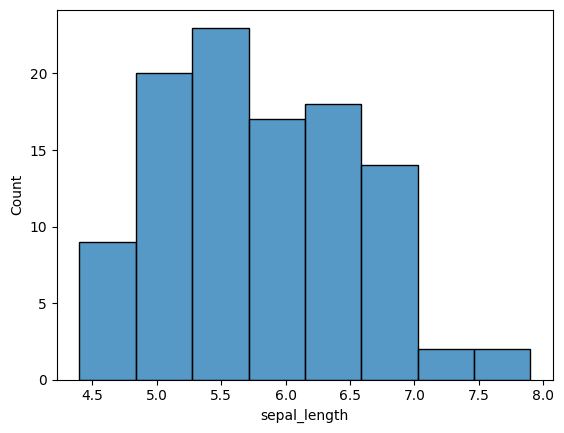

In [141]:
sns.histplot(data = t_iris, x = 'sepal_length')
plt.show()

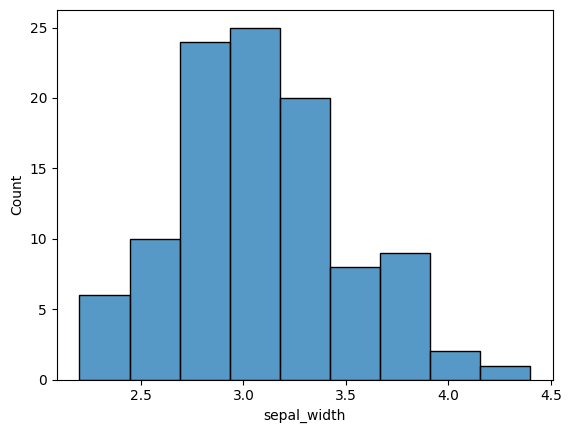

In [146]:
sns.histplot(data = t_iris, x = 'sepal_width')
plt.show()

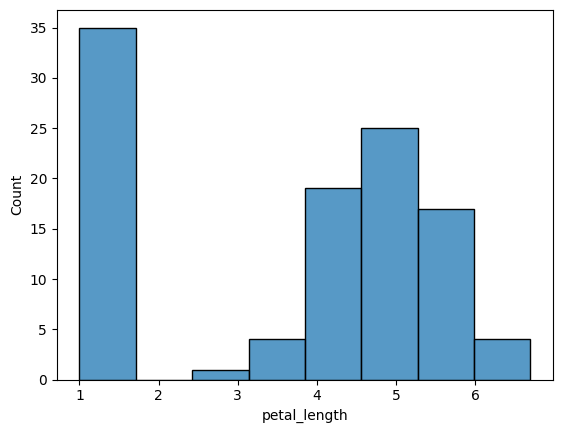

In [145]:
sns.histplot(data = t_iris, x = 'petal_length')
plt.show()

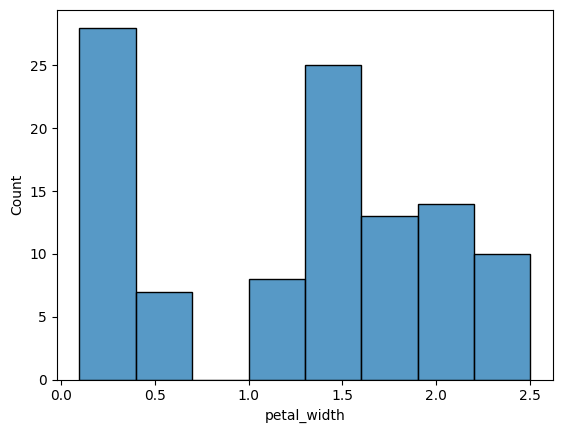

In [164]:
sns.histplot(data = t_iris, x = 'petal_width')
plt.show()

-- I created charts to visualize the frequency of each feature in my train data set.

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.


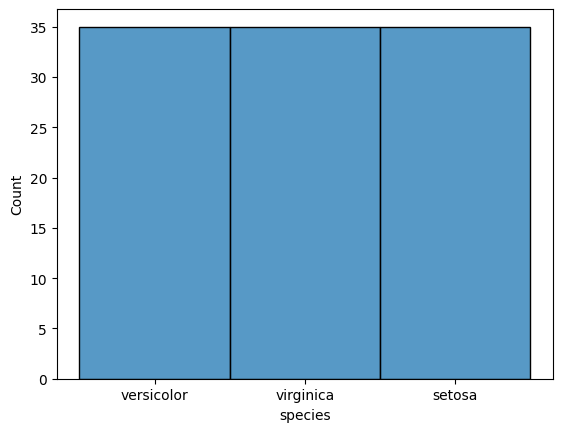

In [163]:
sns.histplot(data = t_iris, x = 'species')
plt.show()

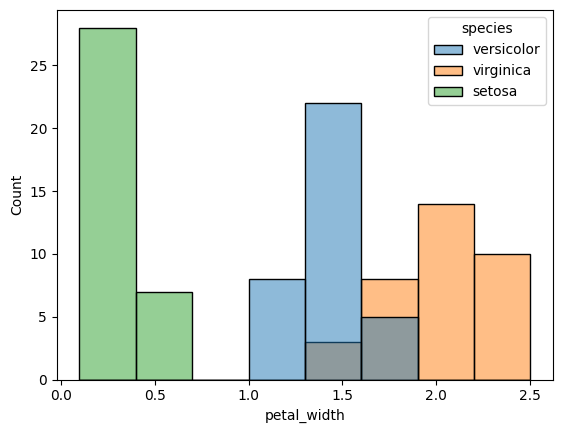

In [165]:
sns.histplot(data = t_iris, x = 'petal_width',hue = 'species')
plt.show()

#### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

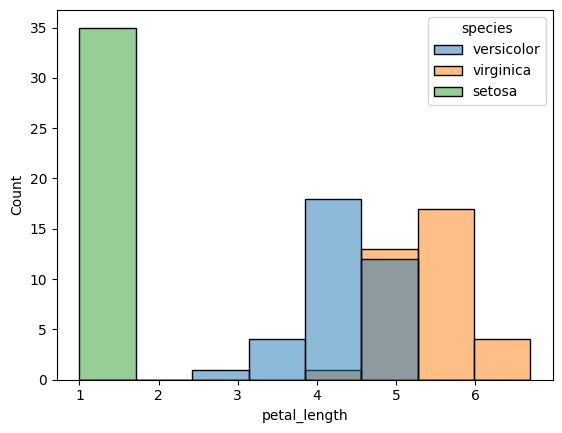

In [154]:
sns.histplot(data = t_iris, x = 'petal_length', hue = 'species')
plt.show()

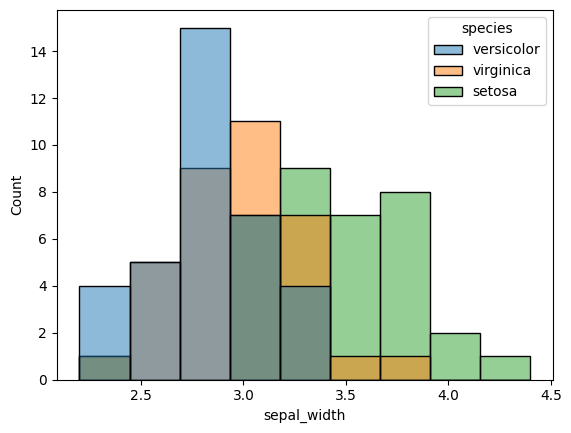

In [155]:
sns.histplot(data = t_iris, x = 'sepal_width', hue = 'species')
plt.show() sepal_length

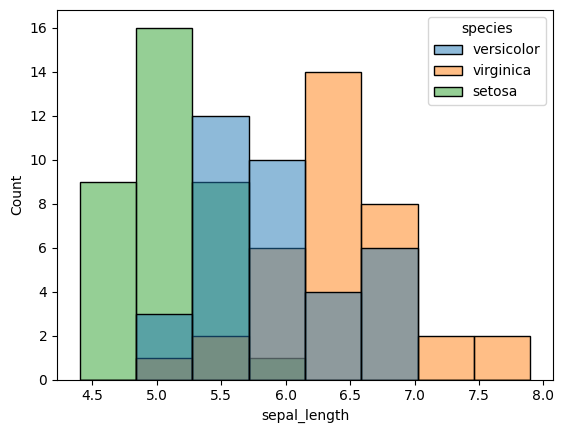

In [156]:
sns.histplot(data = t_iris, x = 'sepal_length', hue = 'species')
plt.show() 

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [174]:
pwm = t_iris.petal_width.mean()

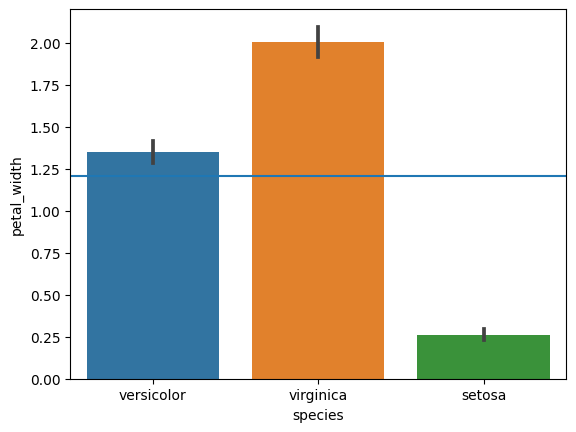

In [178]:
sns.barplot(data = t_iris, x = 'species', y = 'petal_width')
plt.axhline(pwm)
plt.show()

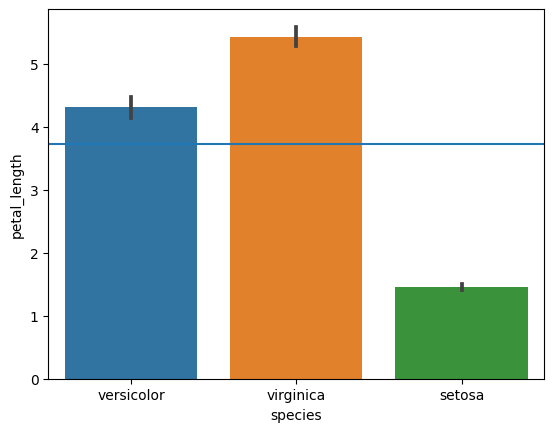

In [180]:
sns.barplot(data = t_iris, x = 'species', y = 'petal_length')
plt.axhline(t_iris.petal_length.mean())
plt.show()

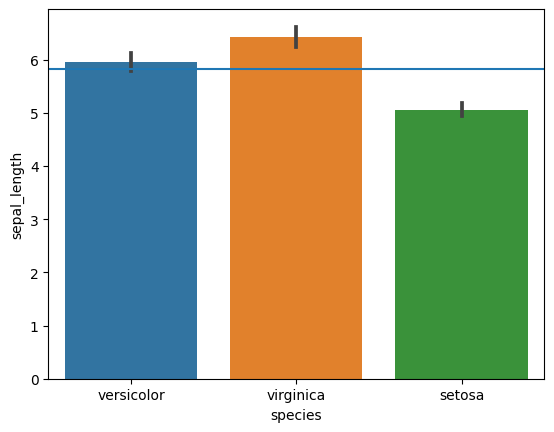

In [181]:
sns.barplot(data = t_iris, x = 'species', y = 'sepal_length')
plt.axhline(t_iris.sepal_length.mean())
plt.show()

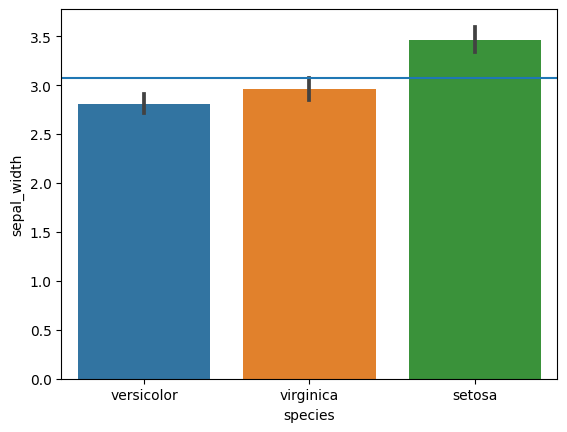

In [182]:
sns.barplot(data = t_iris, x = 'species', y = 'sepal_width')
plt.axhline(t_iris.sepal_width.mean())
plt.show()

### For each measurement type, compute the descriptive statistics for each species.

In [201]:
t_iris_compute = t_iris.groupby('species').describe().T
t_iris_compute

species                setosa  versicolor  virginica
sepal_length count  35.000000   35.000000  35.000000
             mean    5.060000    5.948571   6.431429
             std     0.360718    0.501393   0.572801
             min     4.400000    5.000000   4.900000
             25%     4.850000    5.600000   6.150000
             50%     5.100000    5.900000   6.400000
             75%     5.350000    6.300000   6.700000
             max     5.800000    7.000000   7.900000
sepal_width  count  35.000000   35.000000  35.000000
             mean    3.462857    2.808571   2.960000
             std     0.394883    0.285298   0.337987
             min     2.300000    2.200000   2.200000
             25%     3.200000    2.650000   2.750000
             50%     3.500000    2.800000   3.000000
             75%     3.700000    3.000000   3.150000
             max     4.400000    3.400000   3.800000
petal_length count  35.000000   35.000000  35.000000
             mean    1.451429    4.311429   5.425714
             std     0.154104    0.483718   0.461674
             min     1.000000    3.000000   4.500000
             25%     1.350000    4.050000   5.100000
             50%     1.500000    4.400000   5.400000
             75%     1.500000    4.700000   5.650000
             max     1.700000    5.100000   6.700000
petal_width  count  35.000000   35.000000  35.000000
             mean    0.262857    1.351429   2.008571
             std     0.108697    0.204898   0.277988
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.300000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.250000
             max     0.600000    1.800000   2.500000

### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [203]:
t_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
112,6.8,3.0,5.5,2.1,virginica
77,6.7,3.0,5.0,1.7,versicolor
122,7.7,2.8,6.7,2.0,virginica
40,5.0,3.5,1.3,0.3,setosa


$H_0$ There is NO difference between the virginica species and versicolor species.

$H_a$ There is a differnce between the virginica species and versicolor species.

In [217]:
# Sepal width test
mannwhitneyu(t_iris.sepal_width[t_iris.species == 'versicolor'], t_iris.sepal_width[t_iris.species == 'virginica'])

MannwhitneyuResult(statistic=452.5, pvalue=0.0593693330571072)

In [214]:
# Sepal legnth test
mannwhitneyu(t_iris.sepal_length[t_iris.species == 'versicolor'], t_iris.sepal_length[t_iris.species == 'virginica'])

MannwhitneyuResult(statistic=306.5, pvalue=0.0003224559050875169)

In [218]:
# Petal legnth test
mannwhitneyu(t_iris.petal_length[t_iris.species == 'versicolor'], t_iris.petal_length[t_iris.species == 'virginica'])

MannwhitneyuResult(statistic=31.0, pvalue=8.20671798263995e-12)

In [219]:
# Petal width test
mannwhitneyu(t_iris.petal_width[t_iris.species == 'versicolor'], t_iris.petal_width[t_iris.species == 'virginica'])

MannwhitneyuResult(statistic=36.5, pvalue=1.1232063642747592e-11)

#### Document takeaways & any actions.

-- Setosa species have shortest sepal lengths.
-- Virginica have longest sepal lengths.
-- Setosa species have longest sepal widths.
-- Versicolor have shortest sepal widths.
-- Petal length is the most stratisfied among the three species.
-- Setosa has the most narrow range of petal length as well as the shortest.
-- Virginica as the longest petal length.
-- Setosa has the shortest petal width.
-- Viginica has longest petal width.
-- Versicolor is firmly in the middle of the other two sepal widths.
-- For all Mann whitney tests I rejected the null hypothesis. Except for the Sepal width test. For the Sepal width test I failed to reject the null hypothesis. There is no statistacally sgnificant difference between  versicolor and virginica lengths. -- could this be an error?


## 4. Multivariate Stats

### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


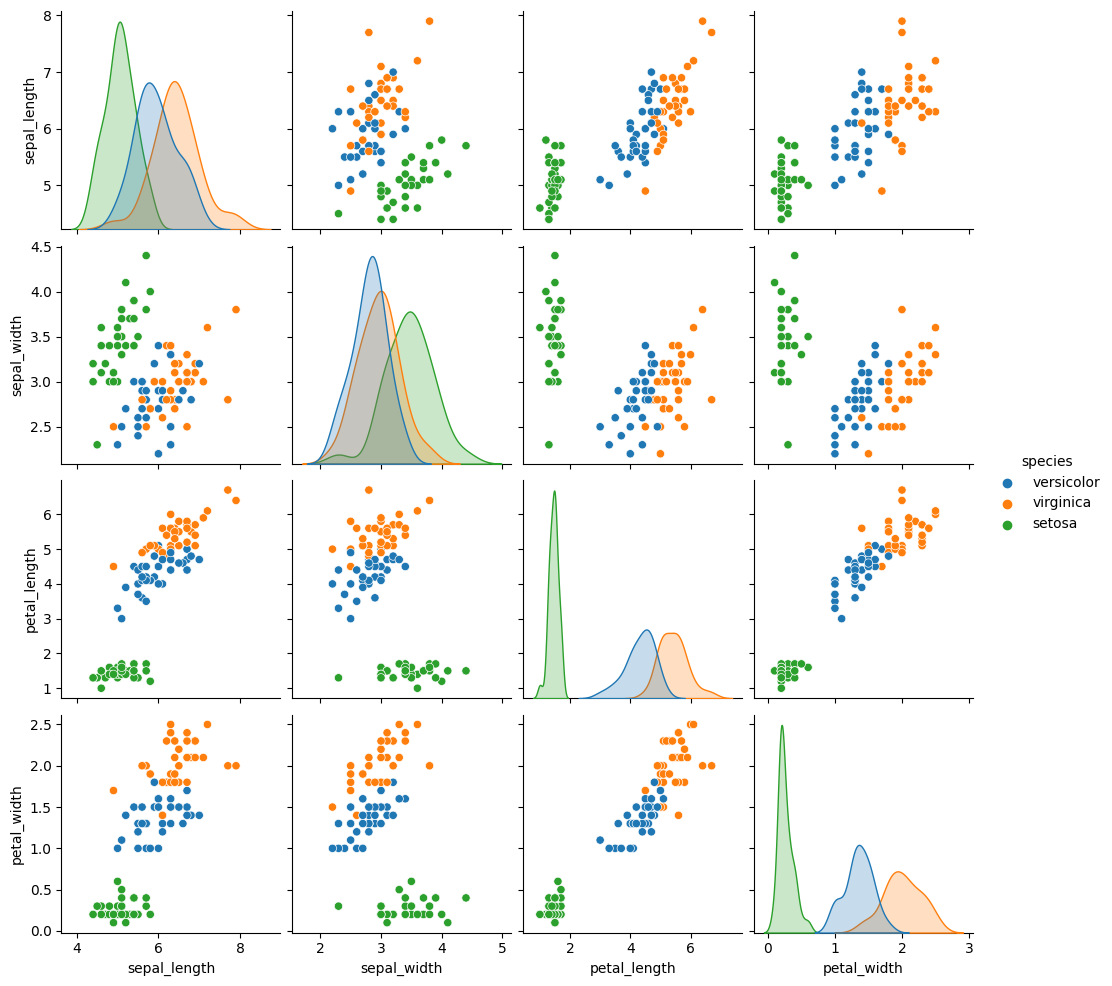

In [223]:
sns.pairplot(t_iris, hue = 'species')
plt.show()

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


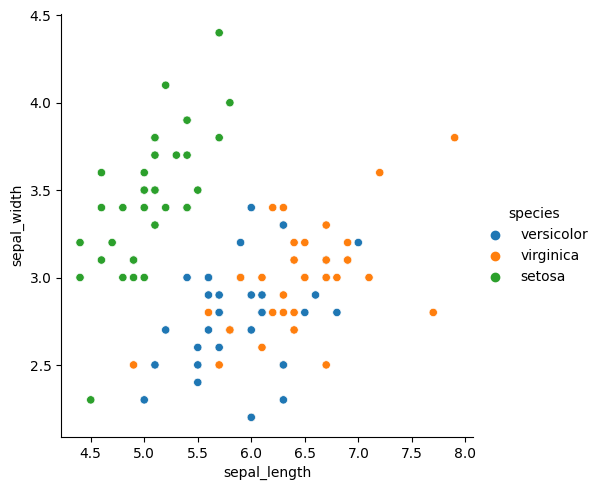

In [233]:
sns.relplot(x = t_iris.sepal_length , y = t_iris.sepal_width , hue=t_iris.species)
plt.show()

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Skipping

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).